# Model #5: Fine tuning with VGG16 pretrained model

In [22]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt #pip install matplotlib
import numpy as np # pip install numpy

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation,Flatten, Conv2D, MaxPooling2D, MaxPool2D,GlobalAveragePooling2D

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from tensorflow.keras.applications import vgg16
from keras.models import model_from_json

# 1.Load a dataset(sort of)

Classes: ['1', '10', '11', '12', '2', '3', '4', '5', '6', '7', '8', '9']
Found 523 images belonging to 12 classes.
Found 96 images belonging to 12 classes.
Found 88 images belonging to 12 classes.
(8, 150, 150, 3)


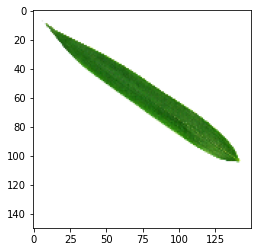

In [23]:
train_dir = pathlib.Path(r"C:\Users\aghen\OneDrive\Desktop/flavia_for_cnn/train")
test_dir = pathlib.Path(r"C:\Users\aghen\OneDrive\Desktop//flavia_for_cnn/test")
val_dir = pathlib.Path(r"C:\Users\aghen\OneDrive\Desktop/flavia_for_cnn/val")

class_names = list([item.name for item in train_dir.glob('*')])
print("Classes:", class_names)


image_generator = ImageDataGenerator(rescale=1./255)

train_generator = image_generator.flow_from_directory(train_dir,
                                                      target_size = (150,150),
                                                      batch_size=8,
                                                      class_mode='categorical',
                                                      shuffle = False)

test_generator = image_generator.flow_from_directory(test_dir,
                                                     target_size=(150,150),
                                                     batch_size=8,
                                                     class_mode='categorical',
                                                     shuffle = False)
val_generator = image_generator.flow_from_directory(val_dir,
                                                     target_size=(150,150),
                                                     batch_size=8,
                                                     class_mode='categorical',
                                                     shuffle = False)

img, label = train_generator.next()
print(img.shape)
plt.imshow(img[0])
plt.show()

# 2.Preprocess dataset

In [24]:
#done already

# 3.Build model

In [25]:
vgg_conv = vgg16.VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

# Freeze all the layers
for layer in vgg_conv.layers[:]:
    layer.trainable = False

model = Sequential()


model.add(vgg_conv)
model.add(Flatten())
model.add(Dense(12, activation='softmax'))


model.summary()



Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_2 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 12)                98316     
Total params: 14,813,004
Trainable params: 98,316
Non-trainable params: 14,714,688
_________________________________________________________________


# 4.Plot the model as a graph

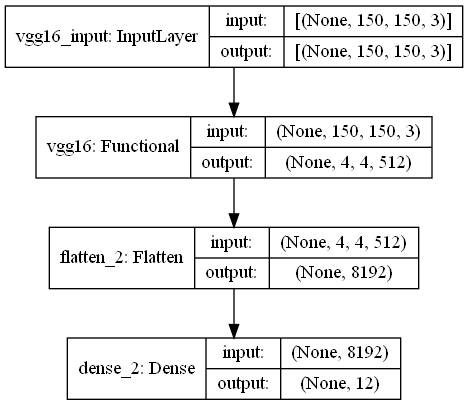

In [26]:
tf.keras.utils.plot_model(model, to_file='model4.png', show_shapes=True)
#pip install pydot

# 5.Compile the model

In [27]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# 6.Fit your model


In [28]:
trained = model.fit(train_generator,
                    epochs = 10,
                    verbose = 1,
                    validation_data=val_generator
                    );


Epoch 1/10
66/66 [==============================] - 24s 352ms/step - loss: 2.6975 - accuracy: 0.4971 - val_loss: 0.4751 - val_accuracy: 0.8750
Epoch 2/10
66/66 [==============================] - 24s 364ms/step - loss: 0.2377 - accuracy: 0.9312 - val_loss: 0.1414 - val_accuracy: 0.9659
Epoch 3/10
66/66 [==============================] - 24s 363ms/step - loss: 0.0904 - accuracy: 0.9771 - val_loss: 0.0977 - val_accuracy: 0.9773
Epoch 4/10
66/66 [==============================] - 24s 358ms/step - loss: 0.0729 - accuracy: 0.9828 - val_loss: 0.3864 - val_accuracy: 0.8295
Epoch 5/10
66/66 [==============================] - 24s 360ms/step - loss: 0.1015 - accuracy: 0.9675 - val_loss: 0.0727 - val_accuracy: 0.9886
Epoch 6/10
66/66 [==============================] - 24s 358ms/step - loss: 0.0228 - accuracy: 1.0000 - val_loss: 0.0446 - val_accuracy: 1.0000
Epoch 7/10
66/66 [==============================] - 25s 378ms/step - loss: 0.0158 - accuracy: 1.0000 - val_loss: 0.0394 - val_accuracy: 1.0000

# Save the model

In [29]:
# serialize model to JSON
model_json = model.to_json()
with open("model5.json", "w") as json_file:
    json_file.write(model_json)

model.save_weights('weights5.h5')

# future usage:

# json_file = open('model5.json', 'r')
# loaded_model_json = json_file.read()
# json_file.close()
# loaded_model = model_from_json(loaded_model_json)
# # load weights into new model
# loaded_model.load_weights("weights5.h5")
# print("Loaded model from disk")

# # evaluate loaded model on test data
# loaded_model.compile(optimizer='adam',
#                   loss='categorical_crossentropy',
#                   metrics=['accuracy'])

# 7.Evaluate the model


In [30]:
loss,accuracy = model.evaluate(test_generator)


print(loss)
print(accuracy)


12/12 [==============================] - 4s 313ms/step - loss: 0.1404 - accuracy: 0.9583
0.1404213309288025
0.9583333134651184


# 8.Make predictions

In [31]:
selected_img = r'C:\Users\aghen\OneDrive\Desktop/standardleaves/2.jpg'
img1 = image.load_img(selected_img, target_size=(150, 150))
x = image.img_to_array(img1)
x = np.expand_dims(x, axis=0)
prediction1 = model.predict(x, batch_size=8)

target_classes = [1, 10, 11, 12, 2, 3, 4, 5, 6, 7, 8, 9]

print("Predicted class: " + str(target_classes[np.argmax(prediction1[0])]))

Predicted class: 2


# 9.Metrics

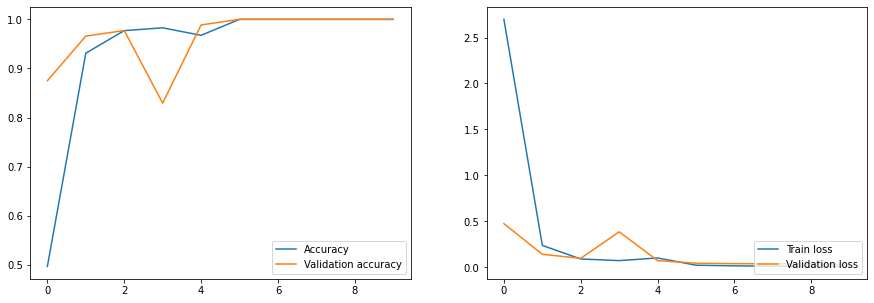

In [32]:
fig, sides = plt.subplots(1, 2, figsize=(15,5))

sides[0].plot(trained.history['accuracy'], label='Accuracy')
sides[0].plot(trained.history['val_accuracy'], label = 'Validation accuracy')
sides[0].legend(loc='lower right')


sides[1].plot(trained.epoch, trained.history["loss"], label="Train loss")
sides[1].plot(trained.epoch, trained.history["val_loss"], label="Validation loss")
sides[1].legend(loc='lower right')